# Can You Win A Spelling Bee If You Know 99 Percent Of The Words?

This is my solution to the [Riddler Express](https://fivethirtyeight.com/features/can-you-win-a-spelling-bee-if-you-know-99-percent-of-the-words/) from 5th april 2019

## Prompt

From Steven Pratt, ordinal bee probability:

You are competing in a spelling bee alongside nine other contestants. You can each spell words perfectly from a certain portion of the dictionary but will misspell any word not in that portion of the book. Specifically, you have 99 percent of the dictionary down cold, and your opponents have 98 percent, 97 percent, 96 percent, and so on down to 90 percent memorized. The bee’s rules are simple: The contestants take turns spelling in some fixed order, which then restarts with the first surviving speller at the end of a round. Miss a word and you’re out, and the last speller standing wins. The bee words are chosen randomly from the dictionary.

First, say the contestants go in decreasing order of their knowledge, so that you go first. What are your chances of winning the spelling bee? Second, say the contestants go in increasing order of knowledge, so that you go last. What are your chances of winning now?

## Solution

For my solution i created contestants and simulated the bees, in order of strength and in reverse.

In [1]:
import random as r
import matplotlib.pyplot as plt

In [2]:
class SpellingBeeContenstant():
    _knowledge = 0

    def __init__(self, percentage_knowledge):
        self._knowledge = percentage_knowledge

    def get_knowledge(self):
        return self._knowledge

    def __str__(self):
        return str(self._knowledge)

In [3]:
def test_player(player : SpellingBeeContenstant):
    return player.get_knowledge() >= r.randint(1,100)

In [4]:
def setup_spelling_bee(incrementation_bool : bool):
    players = []
    for i in range(0, 10):
        if incrementation_bool:
            players.append(SpellingBeeContenstant(90 + i))
        else :
            players.append(SpellingBeeContenstant(99 - i))
    return players


def run_spelling_bee(increment_bool):
    players = setup_spelling_bee(increment_bool)

    while True:
        for player in players:
            if not test_player(player):
                players.remove(player)
            if len(players) == 1:
                return players[0]


def simulate_several_bees(amount, incrementation_bool):
    wincount = [0 for i in range(10)]
    for i in range(amount):
        wincount[run_spelling_bee(incrementation_bool).get_knowledge() - 90] += 1
    return [x / amount for x in wincount]

In [5]:
def graph_wins(win_count_list : list):
    labels = [str(i) for i in range(90, 100)]
    winpct = win_count_list

    plt.bar(labels, winpct)
    plt.ylabel('Win Share')
    plt.title('Win Share of each contestant')
    plt.show()

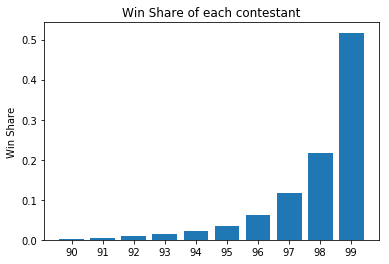

In [6]:
graph_wins(simulate_several_bees(10000, True))

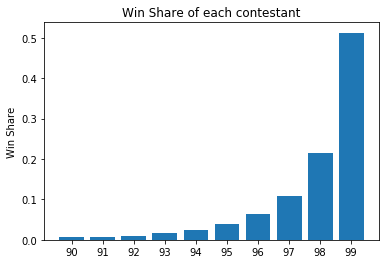

In [7]:
graph_wins(simulate_several_bees(10000, False))

As we can see, although there is an advantage of being last in the rotation, the effects of this advantage are miniscule. When starting, the 99th percentile candidate wins 52.0% of bees. However when ending each round the candidate chances increases to 52.5%.